# **Model**
****

In Artificial Intelligence the modeling is the **creation, training, and deployment** of Machine Learning algorithms. The goal is to emulate logical decision-making based on the available data. 

In [1]:
# Importing the necessary libraries for the data analysis and transformations
import pandas as pd
import numpy as np
from dask import dataframe as dd
import matplotlib.pyplot as plt
from sklearn import preprocessing, decomposition, impute
from sklearn.experimental import enable_iterative_imputer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neural_network import MLPClassifier
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import confusion_matrix

In [2]:
#Obtaining the collapsed dataset
collapsed_dataframes_customers = pd.read_csv('../../../customers_train_collapsed.csv')
collapsed_dataframes_customers

,Unnamed: 0,customer_ID,target,col_0,col_1,col_2,col_3,col_4,col_5,col_6,...,col_10,col_11,col_12,col_13,col_14,col_15,col_16,col_17,col_18,col_19
0,0,00000fd6641609c6ece5454664794f0340ad84dddce9a2...,0.0,-0.280181,-0.122637,0.099542,-0.135973,-0.656911,-0.110967,1.207530,...,0.058870,0.034278,0.558872,-0.479942,-0.038234,0.111570,-0.064863,0.028759,0.287940,-0.331210
1,1,00001b22f846c82c51f6e3958ccd81970162bae8b007e8...,0.0,-0.281980,-0.125946,0.062056,-0.170239,-0.629546,-0.055919,1.212601,...,-0.006098,0.004587,0.693352,-0.749227,0.260122,-0.531804,-0.124948,-0.258238,-0.833393,-0.052249
2,2,0000d17a1447b25a01e42e1ac56b091bb7cbb06317be4c...,0.0,-0.278351,-0.117816,0.020670,-0.087226,-0.211682,-0.049215,0.034941,...,-0.088305,-0.077364,0.155763,-0.473690,-0.226074,0.854736,0.490231,0.884682,-0.946767,0.338236
3,3,0001337ded4e1c2539d1a78ff44a457bd4a95caa55ba17...,1.0,-0.130936,-0.964893,0.045135,0.023731,3.847424,-4.277908,0.530064,...,-0.090631,-0.088810,0.352208,1.771306,0.985142,-0.102146,-2.713682,-0.023137,0.773282,-0.815698
4,4,0002e335892f7998f0feb3a59f32d652f0da7c85e535b9...,1.0,-0.280353,-0.126226,-0.029296,-0.116558,-0.345007,-0.006028,0.264417,...,-0.111120,0.254776,-0.174261,-0.522282,0.044188,0.120875,0.284845,0.487934,-0.003797,-0.053385
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91778,91778,fffb8cb2a4375ee042827ce1e880268ca33b1091bb6811...,0.0,-0.280709,-0.121619,0.037401,-0.144354,-0.467724,-0.052593,0.832362,...,2.738790,0.151169,1.197021,-0.718927,0.359456,-0.346324,-0.130578,-0.541321,-0.142939,-0.047826
91779,91779,fffd1a37da07c54a930788ab53061cd7bd34d38592205e...,0.0,-0.280680,-0.127162,0.035884,-0.158355,-0.728662,-0.133737,1.569380,...,0.099038,-0.061419,0.820932,-0.180159,0.606514,0.253463,0.031521,0.011908,-0.319821,-0.000937
91780,91780,fffdc3a28b2d17b4136b18ab6a554ccb3d98ec3a9305a0...,0.0,-0.279368,-0.111902,-0.130513,-0.133617,-0.243089,0.007583,0.032265,...,-0.044157,-0.083748,0.484693,0.986134,0.708630,-0.815700,0.272789,-0.083764,0.142393,0.281808
91781,91781,fffe39594fad367d9eb8ae18537b56b0739c4cc3ab9810...,1.0,-0.262714,-0.102271,-0.255818,-0.048265,0.981403,0.241324,-1.748139,...,-0.190541,-0.158513,0.884743,-0.460534,0.471933,-0.045746,-0.129607,0.274542,0.552305,-0.638847


In [3]:
#Defining dependant and independant variables
Y = collapsed_dataframes_customers['target'] #Dependant
X = collapsed_dataframes_customers.drop(columns=['target', 'Unnamed: 0', 'customer_ID']) #Independant

### **Implementing the algorithm**
****

Multi layer perceptron (MLP) is a supplement of feed forward neural network. It consists of three types of layers:
- The **input** layer: In this case are the clients with the filtered information.
- The **output** layer: Target predicted for each client. (0/1)
- The **hidden** layer: Layers placed in between the input and output fully in charge of the learning. They need a number of epochs, size of the hidden layers, an activaction function and a solver type. In a MLP model, the data flows in the forward direction from input to output layer. 

We decided to use this model due to its high efficiency working with classification problems and its easy implementation.

In [4]:
#Splitting the dataset into training and validation sets
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size = 0.2, random_state = 21)

In [15]:
#Initializing the MLPClassifier hyperparameters
N_EPOCHS = 300
classifier = MLPClassifier(hidden_layer_sizes=(60,60), max_iter=N_EPOCHS,activation = 'relu',solver='adam',random_state=1)

In [17]:
#Fitting the training data to the network
classifier.fit(X_train, y_train)

C:\Users\bobad\AppData\Roaming\Python\Python39\site-packages\sklearn\neural_network\_multilayer_perceptron.py:709: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


MLPClassifier(hidden_layer_sizes=(60, 60), max_iter=300, random_state=1)

In [ ]:
#1cross_val_score(classifier, X_train, y_train, cv=5)

In [ ]:
#Predicting y for X_val
y_pred = classifier.predict(X_test)
y_pred

array([0., 0., 0., ..., 0., 0., 0.])

### **Model Evaluation**
****

In [ ]:
#Getting the accuracy of the model
classifier.score(X_test, y_test)

0.8640845454050226

In [ ]:
#Creating a confusion matrix to help determinate accuracy wtih classification model
def accuracy(confusion_matrix):
   diagonal_sum = confusion_matrix.trace()
   sum_of_all_elements = confusion_matrix.sum()
   return diagonal_sum / sum_of_all_elements

In [ ]:
#Evaluataion of the predictions against the actual observations in y_val
#cm = confusion_matrix(y_pred, y_test)

#Printing the accuracy
#print(f"Accuracy of Model: {accuracy(cm)}")

#cm

# sumas todo

### **Plotting results**
****

epoch:  0
epoch:  1
epoch:  2
epoch:  3
epoch:  4
epoch:  5
epoch:  6
epoch:  7
epoch:  8
epoch:  9
epoch:  10
epoch:  11
epoch:  12
epoch:  13
epoch:  14
epoch:  15
epoch:  16
epoch:  17
epoch:  18
epoch:  19
epoch:  20
epoch:  21
epoch:  22
epoch:  23
epoch:  24
epoch:  25
epoch:  26
epoch:  27
epoch:  28
epoch:  29
epoch:  30
epoch:  31
epoch:  32
epoch:  33
epoch:  34
epoch:  35
epoch:  36
epoch:  37
epoch:  38
epoch:  39
epoch:  40
epoch:  41
epoch:  42
epoch:  43
epoch:  44
epoch:  45
epoch:  46
epoch:  47
epoch:  48
epoch:  49
epoch:  50
epoch:  51
epoch:  52
epoch:  53
epoch:  54
epoch:  55
epoch:  56
epoch:  57
epoch:  58
epoch:  59
epoch:  60
epoch:  61
epoch:  62
epoch:  63
epoch:  64
epoch:  65
epoch:  66
epoch:  67
epoch:  68
epoch:  69
epoch:  70
epoch:  71
epoch:  72
epoch:  73
epoch:  74
epoch:  75
epoch:  76
epoch:  77
epoch:  78
epoch:  79
epoch:  80
epoch:  81
epoch:  82
epoch:  83
epoch:  84
epoch:  85
epoch:  86
epoch:  87
epoch:  88
epoch:  89
epoch:  90
epoch:  9

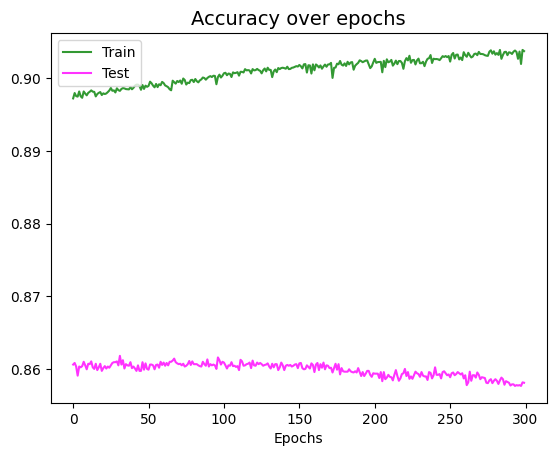

In [ ]:
#Plotting results
N_CLASSES = np.unique(y_train)

scores_train = []
scores_test = []

# EPOCH
epoch = 0
while epoch < N_EPOCHS:
    print('epoch: ', epoch)

    classifier.partial_fit(X_train, y_train, classes=N_CLASSES)

    # SCORE TRAIN
    scores_train.append(classifier.score(X_train, y_train))

    # SCORE TEST
    scores_test.append(classifier.score(X_test, y_test))

    epoch += 1

""" Plot """
plt.plot(scores_train, color='green', alpha=0.8, label='Train')
plt.plot(scores_test, color='magenta', alpha=0.8, label='Test')
plt.title("Accuracy over epochs", fontsize=14)
plt.xlabel('Epochs')
plt.legend(loc='upper left')
plt.show()

In [18]:
#from joblib import dump
#dump(classifier, "dummy-model.joblib")

['dummy-model.joblib']